In [19]:
# Cell 1: Imports and helper function
import os
import glob

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
from tensorboard.backend.event_processing import event_accumulator

def load_scalars(log_dir, tag_filter=None):
    """
    Load all scalar events from the first EventAccumulator found under log_dir.
    If tag_filter is provided, only returns tags containing that substring.
    Returns a dict: { tag_name: [(step, value), ...], ... }
    """
    # find the most recent event file
    event_files = glob.glob(os.path.join(log_dir, "**", "events.*"), recursive=True)
    if not event_files:
        raise FileNotFoundError(f"No TensorBoard event files found under {log_dir}")
    ea = event_accumulator.EventAccumulator(event_files[0],
                                            size_guidance={'scalars': 0})
    ea.Reload()
    # filter tags
    tags = ea.Tags().get('scalars', [])
    if tag_filter:
        tags = [t for t in tags if tag_filter in t]
    data = {}
    for tag in tags:
        events = ea.Scalars(tag)
        data[tag] = [(e.step, e.value) for e in events]
    return data


In [ ]:
# Cell 2: Load your train and test scalars
# Replace this with the path to your TensorBoard log directory
log_dir = "../exploration/runs/Jul13_19-51-29_Mac.attlocal.net"

# load all tags containing “train” and “test”
train_curves = load_scalars(log_dir, tag_filter="train")
test_curves  = load_scalars(log_dir, tag_filter="test")


{'Loss/train': [(1, 2.365997791290283), (2, 2.2128946781158447), (3, 1.8771077394485474), (4, 1.6020557880401611), (5, 1.5316317081451416), (6, 1.5100785493850708), (7, 1.4957081079483032), (8, 1.481544852256775), (9, 1.4661314487457275), (10, 1.4520683288574219), (11, 1.4384596347808838), (12, 1.4234286546707153), (13, 1.407057762145996), (14, 1.3914003372192383), (15, 1.375535011291504), (16, 1.3596762418746948), (17, 1.3436143398284912), (18, 1.3278371095657349), (19, 1.3120368719100952), (20, 1.2966276407241821), (21, 1.281974196434021), (22, 1.2678672075271606), (23, 1.253945231437683), (24, 1.241046667098999), (25, 1.2278813123703003), (26, 1.2155568599700928), (27, 1.2033815383911133), (28, 1.1924355030059814), (29, 1.1819448471069336), (30, 1.1721408367156982), (31, 1.1633797883987427), (32, 1.154668927192688), (33, 1.1470974683761597), (34, 1.1396443843841553), (35, 1.1325148344039917), (36, 1.1266669034957886), (37, 1.1202852725982666), (38, 1.1144015789031982), (39, 1.108637

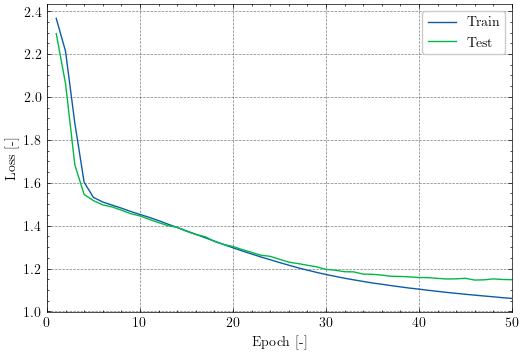

In [24]:
plt.figure(figsize=(6, 4))
plt.plot([x[0] for x in train_curves["Loss/train"]], [x[1] for x in train_curves["Loss/train"]], label="Train")
plt.plot([x[0] for x in test_curves["Loss/test"]], [x[1] for x in test_curves["Loss/test"]], label="Test")
plt.xlabel("Epoch [-]")
plt.ylabel("Loss [-]")
plt.xlim(0, 50)
plt.legend()
plt.savefig("learned_heuristic_loss.pdf")
plt.show()